# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.025297e+01     6.567687e+00
 * time: 0.00417780876159668
     1     2.601513e+01     4.737665e+00
 * time: 0.012275934219360352
     2     2.014297e+01     7.700121e+00
 * time: 0.03128480911254883
     3     1.766005e+01     7.499789e+00
 * time: 0.0503687858581543
     4     1.372412e+01     3.439661e+00
 * time: 0.06923079490661621
     5     1.113249e+01     1.247460e+00
 * time: 0.08799576759338379
     6     1.032792e+01     1.296910e+00
 * time: 0.10301589965820312
     7     9.926968e+00     8.014437e-01
 * time: 0.11815786361694336
     8     9.759250e+00     7.085656e-01
 * time: 0.1329360008239746
     9     9.653422e+00     5.317180e-01
 * time: 0.14813780784606934
    10     9.563347e+00     7.222849e-01
 * time: 0.16341781616210938
    11     9.498608e+00     3.779950e-01
 * time: 0.17835593223571777
    12     9.487249e+00     7.036395e-01
 * time: 0.18942594528198242
    13     9.431372e+00     5.630186e-01
 * time: 

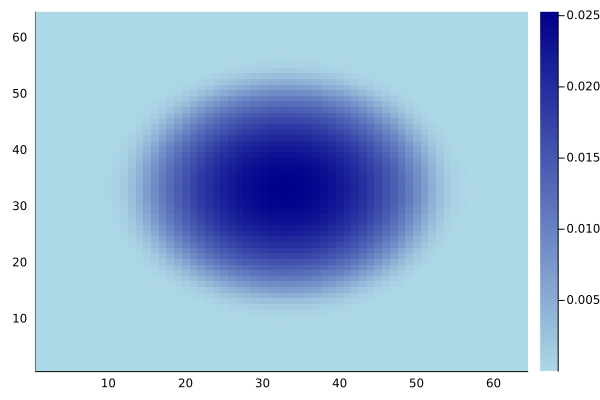

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)